### Predicting  California House Prices with  Linear Regression

### Objective
* To predict California Housing Prices using the most simple Linear Regression Model and see how it performs.
* To understand the modeling workflow using mlpack.

### About the Data
 This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.
 
 This dataset is also used in a book HandsOn-ML ( a very good book and highly recommended).[ https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/].
 
 The dataset in this directory is almost identical to the original, with two differences:
207 values were randomly removed from the totalbedrooms column, so we can discuss what to do with missing data. An additional categorical attribute called oceanproximity was added, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island. This allows discussing what to do with categorical data.
Note that the block groups are called "districts" in the Jupyter notebooks, simply because in some contexts the name "block group" was confusing."

Lets look at the features of the dataset:
* Longitude : Longitude coordinate of the houses.
* Latitude : Latitude coordinate of the houses.
* Housing Median Age : Average life span of houses.
* Total Rooms : Number of rooms in a location.
* Total Bedrooms : Number of bedroooms in a location.
* Population : Population in that location.
* Median Income : Median Income of households in a location.
* Median House Value : Median House Value in a location.
* Ocean Proximity : Closeness to shore. 

### Approach
 Here, we will try to recreate the workflow from the book mentioned above. 
 * Look at the Big Picture.
 * Get the Data.
 * Discover and Visualize the data to gain insights.
 * Pre-Process the data for the Ml Algorithm.
 * Create new features. 
 * Splitting the data.
 * Training the ML model using MLPACK.
 * Residuals, Errors and Conclusion.

### Big Picture

Suppose you work in a Real State Agency as an analyst or Data Scientist and your Boss wants you to predict the housing prices in a certain location. You are provided with a dataset. So, what will be the first thing to do?

If you are probably jumping right into anaylsing the data and ML Algos, then this is a wrong a step. Its a big "NO". 
 <h5> The first thing is to ask Questions. </h5>
 
 Questions like :  What will be the predictions used for? Will it be fed into some other system or not? And Many More, just to have concrete goals.
 
 So, your boss says that they will be using the data to get the predcitions so that the other team can work on some investment strategies.
 
So, let's get started.

<h3> Importing Libraries </h3>

In [22]:
import mlpack
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


<h3>Get the Data</h3>

Here, we already have the 'CSV' file, so we will simply just download it. 

In [2]:
!wget -q https://datasets.mlpack.org/examples/housing.csv

<h3>  Discover and Visualize the Data </h3>

In [23]:
dataset = pd.read_csv('housing.csv')

In [24]:
# Lets print the first 5 rows of the dataset.
dataset.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
# Lets look into some statistics.
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<i>If you look closely, "total_bedrooms" column has some missing values. Later, we will learn how to deal with these missing values.</i>

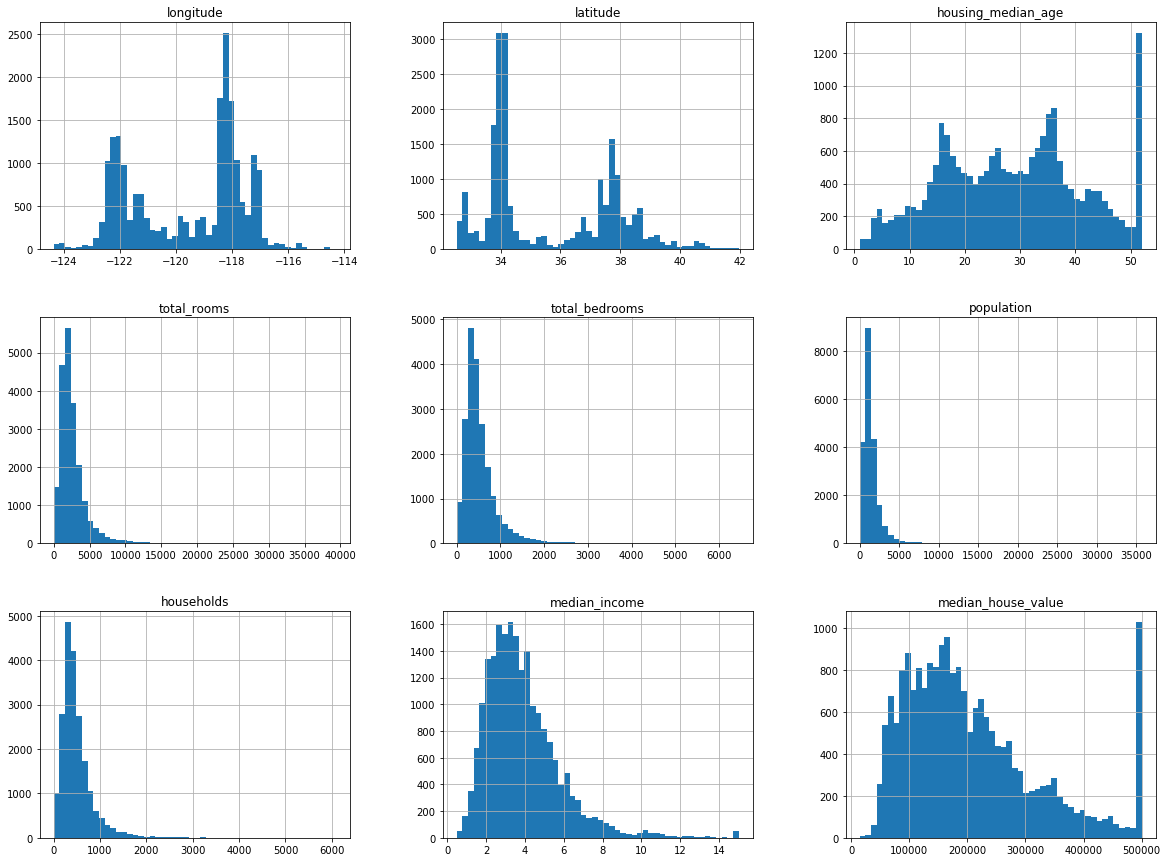

In [27]:
# We are using matplotlib for visualization.
dataset.hist(bins=50, figsize=(20,15))
plt.show()

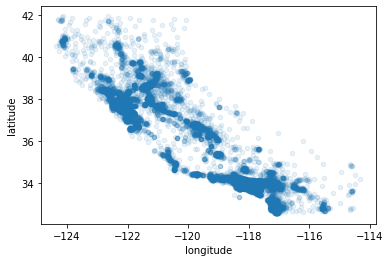

In [28]:
# Let's plot  a scatter plot according to co-ordinates.
dataset.plot(kind="scatter",
             x="longitude", 
             y="latitude", 
             alpha = 0.1)


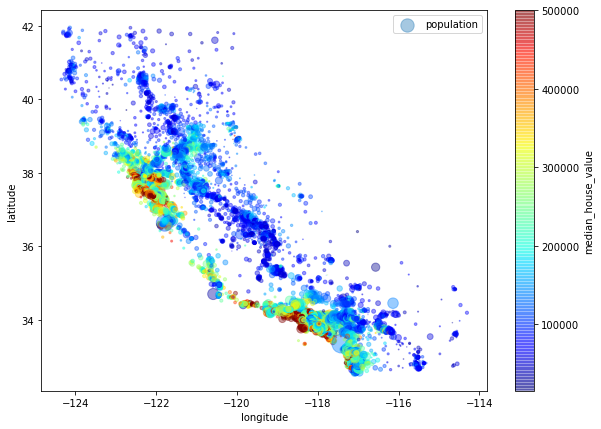

In [29]:
# Now lets plot according to price.
dataset.plot(kind="scatter",
             x="longitude", 
             y="latitude",
             alpha=0.4,
             s=dataset["population"]/100, 
             label="population", 
             figsize=(10,7),
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True,
             sharex=False)
plt.legend()

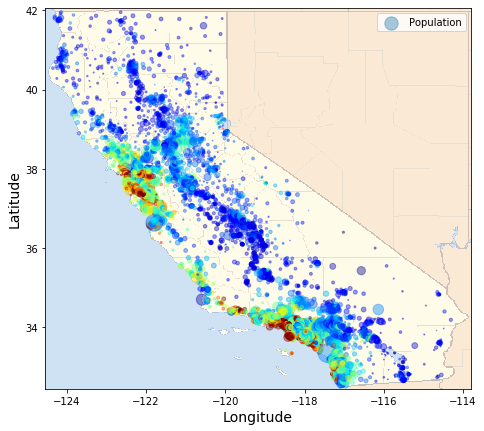

In [30]:
# Lets plot this on top of a piece of california map.
california_img = mpimg.imread('california.png') #path to california image.
ax = dataset.plot(kind="scatter",
                  x="longitude",
                  y="latitude", 
                  figsize=(10,7),
                  s=dataset['population']/100, 
                  label="Population",
                  c="median_house_value", 
                  cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], 
           alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

<h4>  Let's deal with Missing Values</h4>

In [31]:
# Lets print whichever column has missing values.
sample_incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


<i>It can be clearly seen that only total_bedrooms has missing values. Let's fill these missing values using median of the column.</i>
<br>
<b> NOTE: </b>
 1. We can also impute here using mean.
 2. For categorical data, use mode.

In [32]:
median = dataset["total_bedrooms"].median() # Here, we used median() method to fill missing values with median of column.
dataset["total_bedrooms"].fillna(median, inplace=True)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


It can be clearly seen now that we have filled all the missing values.

<h4>Let's deal with Categorical Values</h4>
We will use One hot encoding for this. It will create seperate columns of all categorical features and use : <br>
'1' : If a row has that feature.<br>
'0' : If a row doesn't have that feature.

In [33]:
def one_hot_encoding(data, dimensions, drop= False):
  for dim in dimensions:
    if(type(data.iloc[:,dim].values[0]) == str):
      uniq = data.iloc[:,dim].unique()
      for val in uniq:
        data[f"{data.columns[dim]}_{val}"] = data.iloc[:,dim].apply(lambda x: 1 if x == val else 0)
      
  if drop:
    data.drop(data.columns[dimensions], axis=1, inplace=True)

In [34]:
one_hot_encoding(data=dataset, dimensions=[9],drop=True)

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_NEAR BAY    20640 non-null  int64  
 10  ocean_proximity_<1H OCEAN   20640 non-null  int64  
 11  ocean_proximity_INLAND      20640 non-null  int64  
 12  ocean_proximity_NEAR OCEAN  20640 non-null  int64  
 13  ocean_proximity_ISLAND      206

<i> As discussed, it created four different features according to categorical values. </i> <br>
<h4> Note : </h4>
   Make sure to remove original Categorical Column as our algorithm works with numeical values.

<h3>Let's create some more features </h3>

If you study the dataset, the rooms and bedrooms data corresponds to the whole location. Since we are trying to predict house price, let's create some features for it.
* Rooms per Household : To get an approximate no. of rooms each house has.
* Bedrooms per Room : To get an approximate no. of bedrooms among total rooms.
* Population per household : To get an approximate no. of residents in a house.

In [36]:
dataset["rooms_per_household"] = dataset["total_rooms"]/dataset["households"]
dataset["bedrooms_per_room"] = dataset["total_bedrooms"]/dataset["total_rooms"]
dataset["population_per_household"] = dataset["population"]/dataset["households"]

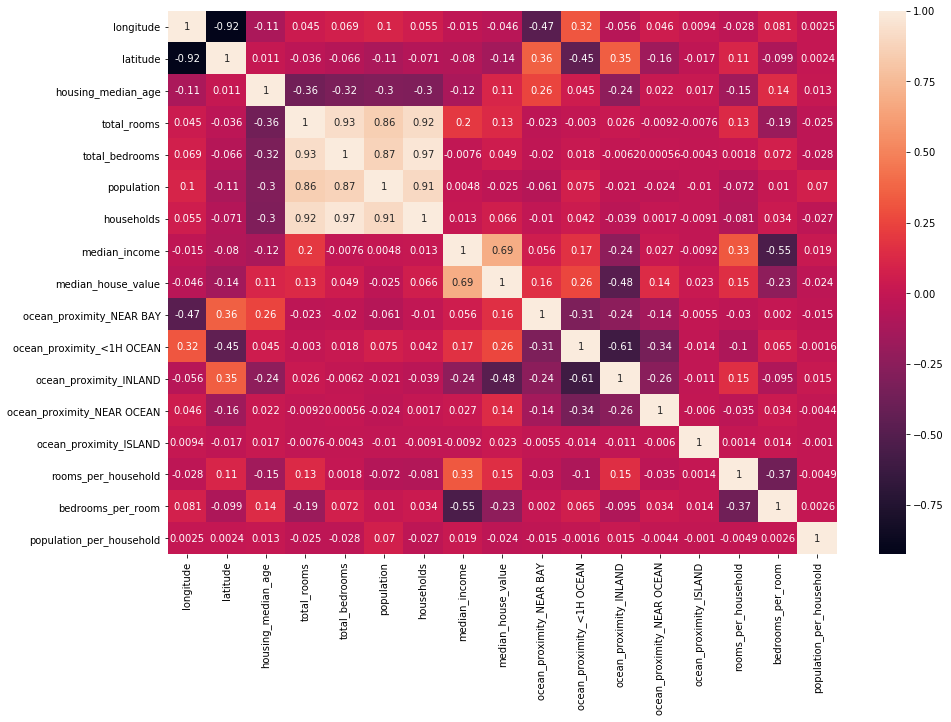

In [37]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

<h4> It is important to check what kind of correlation the features has, especially during feature engineering. </h4> 

<h3> Let's prepare the data for Training </h3>

In [38]:
#This function will split the data into requirement ratio and shuffle so that we can as get random data.
def splitTrainTest(data, testRatio):
  shuffledIndices = np.random.permutation(len(data))
  testSetSize = int(len(data)*testRatio)
  testIndices = shuffledIndices[:testSetSize]
  trainIndices = shuffledIndices[testSetSize:]
  return data.iloc[trainIndices], data.iloc[testIndices]

trainSet, testSet = splitTrainTest(dataset, 0.2)

In [39]:
trainLabels= trainSet["median_house_value"]
trainSet = trainSet.drop("median_house_value", axis = 1)

In [40]:
testLabels = testSet["median_house_value"]
testSet = testSet.drop("median_house_value", axis = 1)

<h3>Model Training </h3>
At this point, now we have our data processed and are ready to create a model for predcition.

In [41]:
model = mlpack.LinearRegression(verbose=True)

In [42]:
output_model = model.fit(training=trainSet, training_responses=trainLabels)

<i> Our Model is Trained, now lets make predictions on the test_set</i>

In [43]:
output_predictions = model.predict(test=testSet)

In [44]:
yPreds = output_predictions.reshape(-1, 1).squeeze()

<i> Let's see the residuals now</i>

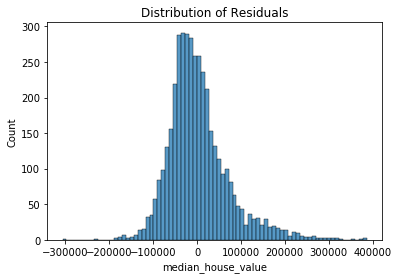

In [46]:
plt.figure(figsize= (6,4))
sns.histplot(testLabels - yPreds)
plt.title("Distribution of Residuals")
plt.show()

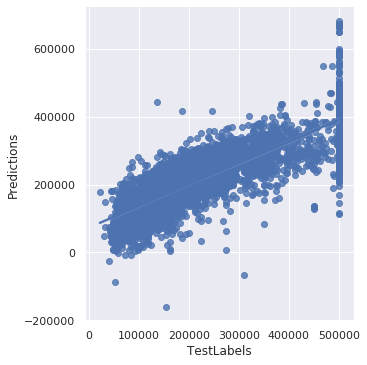

In [51]:
data = pd.DataFrame({'TestLabels':testLabels , 'Predictions':yPreds}, columns=['TestLabels','Predictions'])
sns.set_theme(color_codes=True)
sns.lmplot(x='TestLabels', y='Predictions', data=data)
plt.show()

## Evaluation Metrics for Regression model

In the Previous cell we have visualized our model performance by plotting the best fit line. Now we will use various evaluation metrics to understand how well our model has performed.

* Mean Absolute Error (MAE) is the sum of absolute differences between actual and predicted values, without considering the direction.
$$ MAE = \frac{\sum_{i=1}^n\lvert y_{i} - \hat{y_{i}}\rvert} {n} $$
* Mean Squared Error (MSE) is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset, a lower value is better.
$$ MSE = \frac {1}{n} \sum_{i=1}^n (y_{i} - \hat{y_{i}})^2 $$
* Root Mean Squared Error (RMSE), Square root of MSE yields root mean square error (RMSE) it indicates the spread of the residual errors. It is always positive, and a lower value indicates better performance.
$$ RMSE = \sqrt{\frac {1}{n} \sum_{i=1}^n (y_{i} - \hat{y_{i}})^2} $$

In [52]:
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_pred-y_true))

def MSE(y_true, y_pred):
    return np.mean(np.power(y_pred- y_true, 2))

def RMSE(y_true, y_pred):
    return np.sqrt( np.mean(np.power(y_pred- y_true, 2)))

In [54]:
print("---- Evaluation Metrics ----")
print(f"Mean Absolute Error: {MAE(testLabels, yPreds):.2f}")
print(f"Mean Squared Error: {MSE(testLabels, yPreds):.2f}")
print(f"Root Mean Squared Error: {RMSE(testLabels, yPreds):.2f}")

---- Evaluation Metrics ----
Mean Absoulte Error: 50639.27
Mean Squared Error: 4878809544.62
Root Mean Squared Error: 69848.48


We can clearly see that the MAE is 49674, when compared with the median house value doesn't seems to be a good fit. 

Thus we can conclude that, the simple Linear Regression models is not being able to catch all the features.
So, maybe its time for you to try other algorithms. 
<h5>NOTE : </h5> In the entire ML workflow, you never know exactly which model will perfrom the best. So, usually you try a lot of different algorithms to see which fits the model.